# NumPy Part 1

![alt text](https://codelearnstorage.s3.amazonaws.com/Upload/Blog/thu-vien-numpy-trong-python-63724882299.0039.png)

`numpy` is one of the most essential libraries for Machine Learning and Deep Learning as it allows us to work with large, multi-dimensional arrays and matrices, and perform high-level mathematical functions on these arrays. 

# Set up

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [25]:
# HELPER FUNCTIONS

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def draw_vectors(vectors, origin='origin', cmap=None, labels=None):
    if cmap:
        colors = cmap
    else:
        colors = ['#3498db', '#e67e22', '#f1c40f', '#2ecc71', '#1abc9c']

    if origin == 'origin':
        x_0 = np.zeros(len(vectors))
        y_0 = np.zeros(len(vectors))
    else:
        x_0, y_0 = origin[0], origin[1]
    ax = plt.gca()
    if labels:
        for i in range(len(vectors)):
            ax.text(vectors[i][0]+0.1, vectors[i][1]+0.2, labels[i],
                    {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
                    'bbox': dict(boxstyle="round", fc="white", alpha=0)})
    ax.quiver(x_0, y_0, vectors[:, 0], vectors[:, 1],
              angles='xy', scale_units='xy', scale=1, color=colors)

def projection(x, y):
    color = '#95a5a6'
    ax = plt.gca()
    dot_product = np.dot(x, y)
    y_norm = y / np.dot(y, y)
    x_projection = y_norm * dot_product
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c=color)
    draw_vectors(np.array([x_projection]), cmap=['#bdc3c7'])

def determinant_area(i_hat, j_hat):
    ax = plt.gca()
    sum_vector = i_hat + j_hat
    polygon = plt.Polygon([(0, 0), i_hat, sum_vector, j_hat], fill=True, color='#f39c12', alpha=0.3)
    print('Determinant Area:', np.abs(i_hat[0]*j_hat[1] - i_hat[1]*j_hat[0]))
    ax.add_line(polygon)

# Numpy is much faster than Python list

**Numpy stands for Numerical Python**

NumPy is, just like SciPy, Scikit-Learn, Pandas, etc. one of the packages that you just can’t miss when you’re learning data science, mainly because this library provides you with an array data structure that holds some benefits over Python lists, such as: being more compact, faster access in reading and writing items, being more convenient and more efficient.

NumPy is constrained to arrays that all contain the same type. If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [26]:
a=[3.14,'a',True,1]
print(a)

[3.14, 'a', True, 1]


In [27]:
import numpy as np

In [28]:
tmp = np.array([3.14, 4, 2, 3])
print(tmp)
print(tmp.dtype)

[3.14 4.   2.   3.  ]
float64


In [29]:
normal_list = [3.14, 4, 2, 3, 'a']
print(normal_list)

[3.14, 4, 2, 3, 'a']


In [30]:
tmp = np.array([3.14, 4, 2, 3, 'a'])
print(tmp) # strings
print(tmp.dtype) # unicode

['3.14' '4' '2' '3' 'a']
<U32


In [31]:
tmp = np.array([1, 4, 2, 3, 2])
tmp.dtype

dtype('int32')

In [32]:
# if you want to explicitly set the data type
np.array([1, 2, 3, 4], dtype='float32')


array([1., 2., 3., 4.], dtype=float32)

Let's do a quick speed comparison between numpy array and python list

In [33]:
n=1000000
some_list = [1]*n # python list
some_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [34]:
len(some_list)

1000000

In [35]:
%%time
for i in range(n):
    some_list[i]+=1

CPU times: total: 0 ns
Wall time: 81.6 ms


In [36]:
# Create 1000000 zeros numpy array:
np_arr = np.zeros(1000000)
np_arr

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
%%time
np_arr = np_arr+1

CPU times: total: 0 ns
Wall time: 4 ms


In [38]:
# Like working with list, we also able to use indexing and slicing with numpy array:

np_arr2 = np.array([1,3, 5, 7, 9])

print(np_arr2[2:4])
print(np_arr2[::-1])


[5 7]
[9 7 5 3 1]


# Basics

Let's take a took at how to create tensors with NumPy.

<div align="left">
<img src="https://i.imgur.com/VSCCjUx.png" width="650">
</div>


In [39]:
# Scalar
x = np.array(6) # scalar
print ("x: ", x)

# Number of dimensions
print ("x ndim: ", x.ndim)

# Shape (number of elements at each dimension)
print ("x shape:", x.shape)

# Size of elements (how many numbers does x store)
print ("x size: ", x.size)

# Data type
print ("x dtype: ", x.dtype)

x:  6
x ndim:  0
x shape: ()
x size:  1
x dtype:  int32


## Vector

Vectors are elements of $R^n$ **(lists of n real number)**

$$
\vec{v} = \begin{pmatrix} v_1 \\ v_2 \\ \dots \\ v_n \end{pmatrix}
$$

Different notation to describe a vector of $R^n$
![](http://wiki.fast.ai/images/3/31/Vector_notation.png)

A vector represents the **magnitude** and **direction** of potential change to a point
![](http://wiki.fast.ai/images/1/1a/Vector_magnitude_direction.png)

In [40]:
# Vector (1 dimensional array)
x = np.array([3,4])
print ("x: ", x)
print ("x ndim: ", x.ndim)
print ("x shape:", x.shape)
print ("x size: ", x.size)
print ("x dtype: ", x.dtype) # notice the float datatype

x:  [3 4]
x ndim:  1
x shape: (2,)
x size:  2
x dtype:  int32


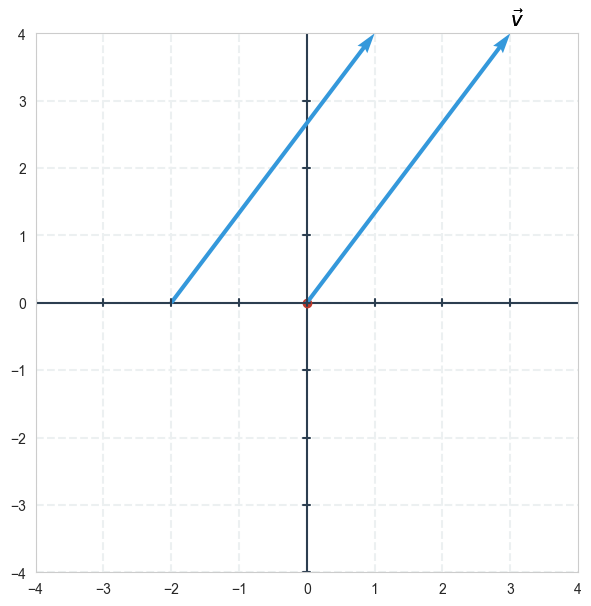

In [41]:
#drawing the vector with origin 0
plt.figure(figsize=(7, 7))
draw_vectors(np.array([x]),labels=[r'$\vec{v}$'])
draw_vectors(np.array([x]),origin=np.array([-2,0]),labels=[r'$\vec{v}$'])
draw_grid()

plt.show()


Length/magnitude of an array

Notation: Length of $\vec{v}$ = ||v||

In [43]:
np.sqrt(x[0]**2 + x[1]**2)

5.0

In [42]:
np.linalg.norm(x)

5.0

## Vector operations

### **Scalar multiplication**

Multiplication of a scalar and a vector

$$
a\vec{v} = a \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} =
\begin{pmatrix} av_1 \\ av_2 \end{pmatrix} 
$$

In [44]:
v = np.array([1, 1])
a=-1
av = a*v
av

array([-1, -1])

### **Addition**

$$
\vec{x} + \vec{y} = 
\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} 
+
\begin{pmatrix} y_1 \\ y_2 \end{pmatrix}
=
\begin{pmatrix} x_1 + y_1 \\ x_2 + y_2 \end{pmatrix}
$$

In [47]:
x = np.array([1, 1])
y = np.array([-2, 2])
z = x + y 
z

array([-1,  3])

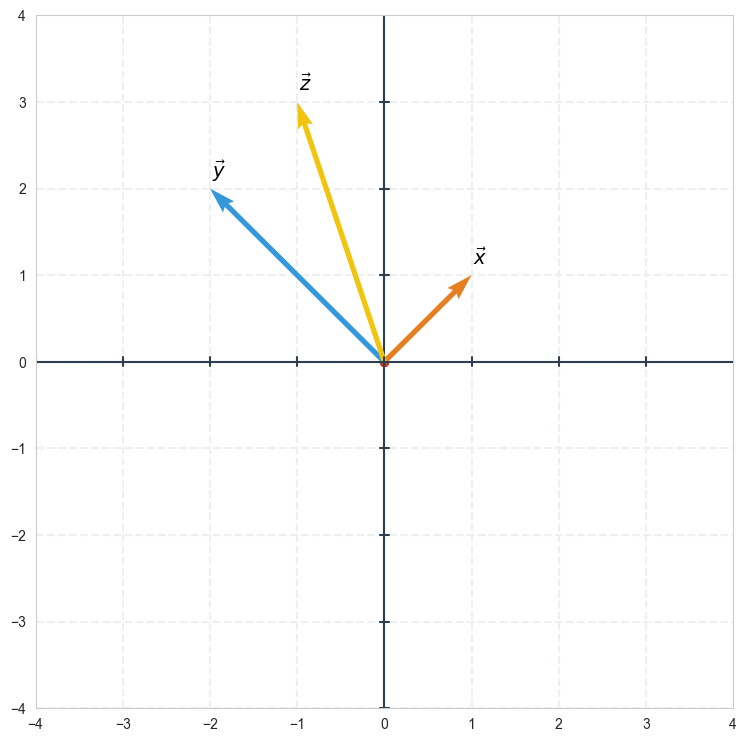

In [48]:
plt.figure(figsize=(9, 9))
draw_grid()
draw_vectors(np.array([y, x, z]), labels=[r'$\vec{y}$', r'$\vec{x}$', r'$\vec{z}$'])
plt.show()
# Subtraction?

### Dot product (of two vectors)

A formal definition

$$
\vec{a}.\vec{b} = \sum_{i}^{n}{a_ib_i} = ||a||.||b||.cos\phi
$$

In [49]:
a = np.array([1,2,3])
b = np.array([4,5,6])
dot_product = 1*4 + 2*5 + 3*6
dot_product

32

In [50]:
np.dot(a, b)

32

Dot product of $\vec{a}$ and $\vec{b}$ is 
- **is positive** when they point at 'similar' directions. Bigger = more similar
- **equals 0** when they are perpendicular.
- **is negative** when they are at dissimilar directions. Smaller (more negative) = more dissimilar

In [51]:
def norm(v):
    return np.linalg.norm(v)
def cosine_sim(a,b):
    return np.dot(a,b)/(norm(a)*norm(b))
def visualize_similarity(a,b):
    print(f'Dot product: {np.dot(a,b)}')
    print(f'Cosine similarity: {cosine_sim(a,b)}')
    plt.figure(figsize=(6,6))
    draw_grid()
    draw_vectors(np.array([a, b]), labels=[r'$\vec{a}$', r'$\vec{b}$'])
    plt.show()

In [52]:
a = np.array([3, 3])

Dot product: 24
Cosine similarity: 1.0


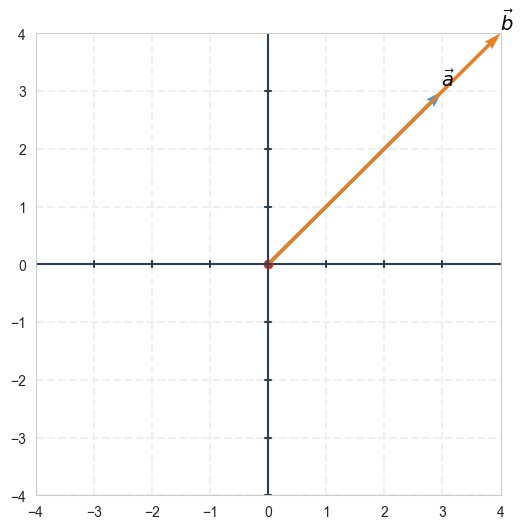

In [53]:
b = np.array([4, 4])
visualize_similarity(a,b)

Dot product: 0
Cosine similarity: 0.0


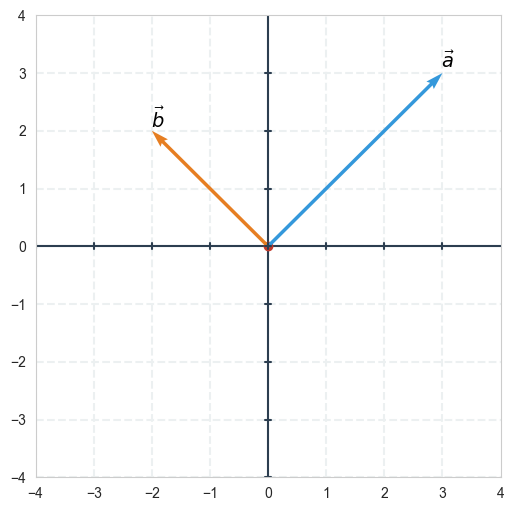

In [54]:
a = np.array([3, 3])
b = np.array([-2, 2])
visualize_similarity(a,b)

Dot product: -12
Cosine similarity: -1.0


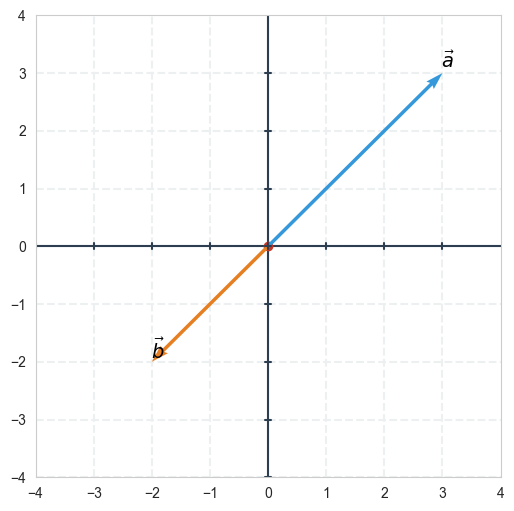

In [58]:
b = np.array([-2, -2])
visualize_similarity(a,b)

Dot product: 9
Cosine similarity: 0.9486832980505138


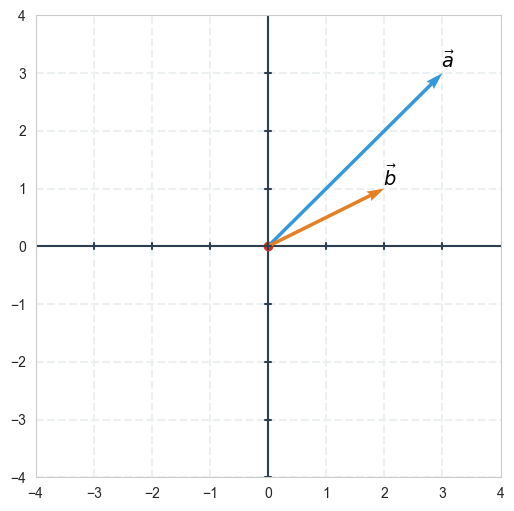

In [62]:
b = np.array([2, 1]) # try with (2,-1)
visualize_similarity(a,b)

Dot product: -3
Cosine similarity: -0.31622776601683794


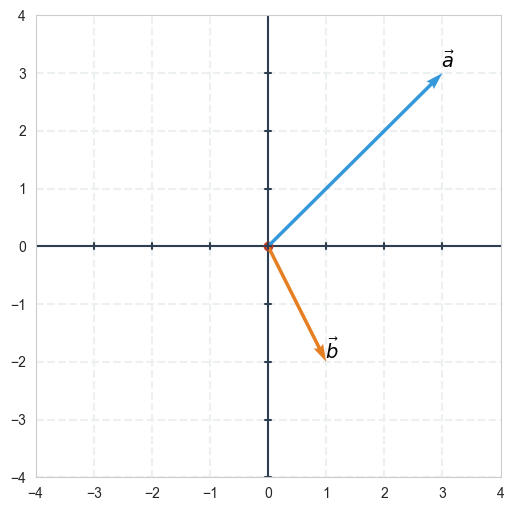

In [68]:
b = np.array([1, -2])
visualize_similarity(a,b)

### Hadamard product (Element-wise multiplication)

In [69]:
a = np.array([1,2,3,4,5,6])
b = np.array([2,3,4,4,5,6])
element_wise = a*b
element_wise

array([ 2,  6, 12, 16, 25, 36])

In [71]:
np.dot(a,b) # dot product result is a scalar

97

## Matrix

A matrix is a two-dimensional rectangular array of numbers

In [73]:
# Matrix (2 dimensional array)
x = np.array([ [1,2] , [3,4] , [5,6]])
print ("x:\n", x)
print ("x ndim: ", x.ndim)
print ("x shape:", x.shape)
print ("x size: ", x.size)
print ("x dtype: ", x.dtype)

x:
 [[1 2]
 [3 4]
 [5 6]]
x ndim:  2
x shape: (3, 2)
x size:  6
x dtype:  int32


### Dimension of a matrix

For a matrix with **m rows and n columns**, we describe the dimensions of a matrix as **m by n** (m x n), and it belongs to $R^{mxn}$

In [74]:
a= np.array([
    [1,2,3], 
    [4,5,6]
])
a.shape

(2, 3)

In [75]:
a= np.array([[1,2,3]])
a.shape

(1, 3)

In [76]:
a= np.array([1,2,3]) # vector
a.shape

(3,)

### Matrix multiplication

One of the most common NumPy operations we’ll use in machine learning is matrix multiplication using the dot product. We take the rows of our first matrix (2) and the columns of our second matrix (2) to determine the dot product, giving us an output of `[2 X 2]`. 

Not all matrices are eligible for multiplication. In addition, there is a requirement on the dimensions of the matrix product. Source.

1. The number of columns in the first matrix must equal the number of rows in the second
2. **The product of an M x N matrix and an N x K matrix is an M x K matrix**. The new matrix takes the rows of the first and columns of the second.

<div align="left">
<img src="https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/images/foundations/numpy/dot.gif" width="450">
</div>

For matrix multiplication, using '@' is prefered than np.dot

https://numpy.org/doc/stable/reference/generated/numpy.dot.html

In [77]:

a = np.array([[1,2,3], [4,5,6]], dtype=np.float64) # we can specify dtype
b = np.array([[7,8], [9,10], [11, 12]], dtype=np.float64)
c = a @ b 
# c = np.dot(a, b)
print (f"Shape: {a.shape} · {b.shape} = {c.shape}")
print (c)

Shape: (2, 3) · (3, 2) = (2, 2)
[[ 58.  64.]
 [139. 154.]]


In [78]:
b@a

array([[ 39.,  54.,  69.],
       [ 49.,  68.,  87.],
       [ 59.,  82., 105.]])

## 3 Dimensional Tensor

In [79]:
# 3-D Tensor
# x = np.array([ [ [1,2],[3,4],[5,6] ] , [ [5,6],[7,8],[8,9] ]])
# or 
x = np.array([
              [[1,2],
               [3,4]],
              [[5,6],
               [7,8]]
              ])

print ("x:\n", x)
print ("x ndim: ", x.ndim)
print ("x shape:", x.shape)
print ("x size: ", x.size)
print ("x dtype: ", x.dtype)

x:
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
x ndim:  3
x shape: (2, 2, 2)
x size:  8
x dtype:  int32


In [83]:
# Install sklearn library:
!pip install -q scikit-learn

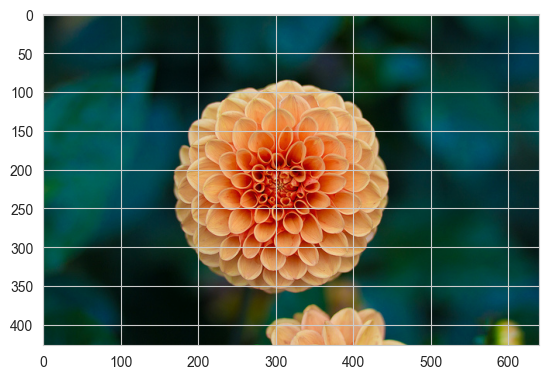

In [84]:
from sklearn.datasets import load_sample_image

img = load_sample_image('flower.jpg')

plt.imshow(img)

In [85]:
print(img)

[[[ 2 19 13]
  [ 3 18 13]
  [ 7 20 13]
  ...
  [ 1 77 64]
  [ 0 76 64]
  [ 0 75 63]]

 [[ 1 18 12]
  [ 3 18 13]
  [ 7 20 13]
  ...
  [ 0 76 64]
  [ 1 74 65]
  [ 1 74 65]]

 [[ 2 17 12]
  [ 6 19 12]
  [ 7 20 13]
  ...
  [ 1 74 65]
  [ 1 74 67]
  [ 1 74 67]]

 ...

 [[ 0 46 40]
  [ 1 48 40]
  [ 1 47 37]
  ...
  [ 5 44 26]
  [ 6 43 26]
  [ 7 44 27]]

 [[ 0 47 41]
  [ 1 48 40]
  [ 1 47 37]
  ...
  [ 6 45 27]
  [ 7 44 27]
  [ 7 44 27]]

 [[ 0 47 41]
  [ 1 48 40]
  [ 0 46 36]
  ...
  [ 7 46 28]
  [ 8 45 28]
  [ 9 43 27]]]


In [86]:
x = img
print ("x:\n", x)
print ("x ndim: ", x.ndim)
print ("x shape:", x.shape)
print ("x size: ", x.size)
print ("x dtype: ", x.dtype)

x:
 [[[ 2 19 13]
  [ 3 18 13]
  [ 7 20 13]
  ...
  [ 1 77 64]
  [ 0 76 64]
  [ 0 75 63]]

 [[ 1 18 12]
  [ 3 18 13]
  [ 7 20 13]
  ...
  [ 0 76 64]
  [ 1 74 65]
  [ 1 74 65]]

 [[ 2 17 12]
  [ 6 19 12]
  [ 7 20 13]
  ...
  [ 1 74 65]
  [ 1 74 67]
  [ 1 74 67]]

 ...

 [[ 0 46 40]
  [ 1 48 40]
  [ 1 47 37]
  ...
  [ 5 44 26]
  [ 6 43 26]
  [ 7 44 27]]

 [[ 0 47 41]
  [ 1 48 40]
  [ 1 47 37]
  ...
  [ 6 45 27]
  [ 7 44 27]
  [ 7 44 27]]

 [[ 0 47 41]
  [ 1 48 40]
  [ 0 46 36]
  ...
  [ 7 46 28]
  [ 8 45 28]
  [ 9 43 27]]]
x ndim:  3
x shape: (427, 640, 3)
x size:  819840
x dtype:  uint8


In [54]:
img.shape

(427, 640, 3)

## Numpy useful function for initialization

NumPy also comes with several functions that allow us to create tensors quickly.

In [56]:
# Functions
print ("a 2x3 matrix full of zeros:\n", np.zeros(shape=(2,3)))
print ("a 2x5 matrix full of ones:\n", np.ones(shape=(2,5)))
print ("a 4x4 identity matrix:\n", np.eye((4))) # identity matrix 
print ("a 3x4 matrix full of random numbers between 0 and 1:\n", np.random.random((3,4)))

a 2x3 matrix full of zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
a 2x5 matrix full of ones:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
a 4x4 identity matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
a 3x4 matrix full of random numbers between 0 and 1:
 [[0.14401603 0.67419449 0.66417964 0.52935588]
 [0.63924294 0.24012089 0.77737187 0.47593938]
 [0.98139419 0.25404214 0.6586476  0.23821005]]


In [71]:
np.random.seed(42)
np.random.random((3,4))

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985]])

# Additional resources

* If you want to learn more checkout the [NumPy reference manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/).
* [Standford CS213n - Python Numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [TutorialsPoint - A comprehensive guide to Python Numpy](https://www.tutorialspoint.com/numpy/index.htm)
* [Datacamp - Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* Another useful tutorial: https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d